[Good visualizations](https://towardsdatascience.com/lets-code-convolutional-neural-network-in-plain-numpy-ce48e732f5d5)<br>
[GitHub](https://github.com/SkalskiP/ILearnDeepLearning.py)

## Machine Learning

### Capacity, Overfitting and Underfitting

The most importent task in machine learning is to train a model a way, that is able to perform well on unseen data. This is called generalization.

A good generalization can be achieved, when two things are aimed to be optimized:

- Minimizing the training error.
- The difference between training error and validation error shall be minimized.

Those two goals correspond with the biggest challenges in machine learning: <b>Underfitting</b> and <b>Overfitting</b>.


Unterfitting means, that the model isn't able to reduce the trainingserror.<br>
Overfitting on the other hand describes a model which fits too much on the used trainingsdata and performs poor on new unseen data.

The reason, why either of the two appear is the choice of the model <b>Capacity</b>.<br>
The capacity of a model describes the free parameters while training. Meaning the parameters which are tuned to fit a specific problem. 

If it choosen to complex, every datapoint in the trainingdataset can be fit almost perfectly corresponding to overfitting.<br>
Is it choosen to simple (not enough parameters) the model isn't even able to fit the training data.

<img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/over-under.png?raw=true" width="500">

To visualize the problematic we can look on a regression problem.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

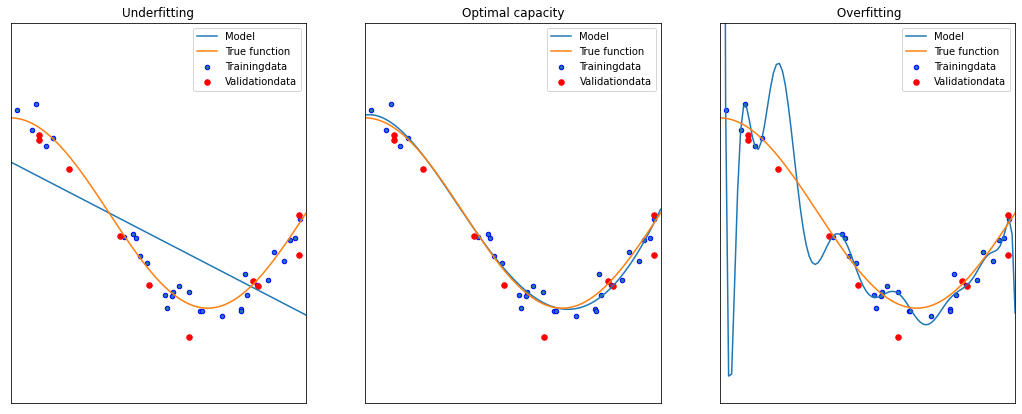

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
np.random.seed(0) 

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
degrees = [1, 4, 15]
titles = ['Underfitting', 'Optimal capacity',' Overfitting']

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X_val = np.sort(np.random.rand(10))
y_val = true_fun(X_val) + np.random.randn(10) * 0.2



plt.figure(figsize=(18, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Trainingdata")
    plt.scatter(X_val, y_val, c='r', edgecolor='r', s=30, label="Validationdata")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(titles[i])
plt.show()


- Underfitting: It can be seen, that the Model can't even approximate the Trainingdata. Therefore it will perform on unseen data poor as well.
- Optimal capacity: The model fits the training data quite well. And even the Validationdata is approximated pretty well.
- Overfitting: The model almost captures every Datapoint in the training set, but isn't able to perform well on unseen data, which might varies from the training set. The model rather learned the random noise in the training data instead of the relationship between features and labels.

#### But how can i handle these problems?

<b>Diagnosing Underfitting...</b><br>
As Seen in the image on top of this notebook, underfitting occurs, when a model isn't able to capture the complexity of the feature/label relationship. With this in mind, if the <b>error</b> (or the accuracy) are poor on training and validation set you probably can't fit the data with the model.

<b>Solution</b><br>
To fix the problem with underfitting, a model with higher complexity can be choosen. Meaning, that more free parameters are used to fit the data.

In the example of the regression from above we have optimized the data fit by increasing the polynomial order from 


$y = a*x + b$

to

$y = \sum_{i=1}^N a_ix^i + b$,

where $N$ describes the polynomial order and $a_i$ the learnable coefficients for the corresponding $x^i$.


<b>Diagnosing Overfitting...</b><br>

Overfitting occurs, if the trainingdata with all it's noise will be fit by the model pretty well. Not learning a general relationship between features and labels. To be able to realize overfitting you can look on the error (accuracy) achieved by the training data and the error (accuracy) on an unseen validation set. If the gap between those errors is high, while the trainingerror is quite small, you probably overfit the model.

<b>Solution</b><br>
There are some solutions which can be used to reduce overfitting.

In General a Model is choosen which complexity is too high to fit the given data and afterwards the weights (Parameters) are regularized by different methods:

- <b>Parameter Penalties:</b> <br>
Assuming that our objective we want to optimize is given with<br>
$J(\theta; X, y) = \mathcal{L}(\theta; X , y)$.<br>
The goal is to reduce the objective  by manipulating the parameters $\theta$ in any way. This way the model is able to create any weight combination to achieve a reduction of the Error and being able to fit the trainingdata completly.
With Parameter Penalties, we can add another function or norm to out objective, to regulate the weight combinations, forcing the model to choose for small weights:<br>
$J(\theta; X, y) = \mathcal{L}(\theta; X , y) + \alpha\Omega(\theta)$,<br>  with $\Omega(\cdot)$ being a function or norm and $\theta$ describing the parameters of the given model and $\alpha$ being a choosen hyperparameter. As it can be seen $\Omega(\cdot)$ doesn't depend on the input data or the label, which means that it simply regulates the Gradient $\nabla_\theta J$ with the choosen function $\Omega$

<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/L2-Reg.PNG?raw=true" width="500"></center>

- <b>Early Stopping:</b><br>
When training a model, the parameters are fit to the training data better and better every epoch. In the beginning the validation error is declining as well. But once the model starts to overfit to the trainingdata, only the training error reduces further, while the validation error is probably increasing again. If this event happens it would be logical to stop the training at this point, since the generalization on unseen data is at it's best. And that's exactly what early stopping is doing.
- <b>Data Augmentation:</b><br>
One huge point to reduce overfitting is to train on more data. This way the model has to make a trade off to fit on a bigger variety on data. But what if the data is limited, simply because there are no more specific cases, or getting those is expensive?
Here Data Augmentation can be used. Data Augmentation is a way to synthetically increase the available dataset. Different methods can be used to increase the variety of the data.
 - Flip the image
 - Shift image
 - Rotate the image
 - Manipulate the Colors
 - Add Noise
 - Add filled geometrical forms
 - Add filters
 - ...<br>

 which augmentation method can be used depends on the task you want to fullfill.
For example, shifting a digit as image, might be useful for classifier to learn a better invariance. Flipping a digit, will result to a wrong feature/label relationship.
<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/Augmentation.PNG?raw=true" width="500"></center>

- <b>Ensemble Methods:</b><br>
 Train different models seperately for the same task and average the results on inference time.
 For example the same model can be initialized with different weights or different hyperparameters can be used. If the models are maximally uncorrelated, the averaging can obtain a robuster model.

- <b> Dropout:</b><br>
While training a model, neurons are set to zero (with some probability).
This way we can simulate different models for the training of the same task. The idea behind this is to create ensemble "on the fly" from one single network.
<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/dropout.PNG?raw=true" width="500"></center>



## Convolutional Neural Networks

Convolutional Neural Networks (CNN) are a type of neural network, which have shown good performance expecially in imagedata. The Vanilla CNN for classification is built from Convolutional Layers, Pooling Layers, Activations and Fully Connected Layers.

#### Conv Layer
In contrast to normal Artificial Neural Networks (ANN), CNNs using different connection pattern between the layers. The neurons of a layer, don't receive their information of every neuron of the previous layer, but from a smaller area, the so called receptive field.

<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/Conv.PNG?raw=true" width="800"></center>
How do they work?

Why are they useful?

#### Pooling

How do they work?

Why are they useful?

#### Activations

Activation-function are functions which take as Input the sum of one Neuron and transforms them in a choosen way.
They are used to allow non-linearity transformations instead of the identidy.

There are several different activation-functions:


- ReLU: $f(x) = \max(0, x)$
  - Properties
    - No saturation for $ x > 0$
    - Leads to fast convergence
    - Computationally efficient
  - Problems
    - Not zero-centered
    - No learning for $x < 0 \Rightarrow$ dead ReLUs
<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/ReLU.PNG?raw=true" width="350"></center>

In [ ]:
#### Numpy implementation

class ReLU:
  def forward(self, x):
    self.y = np.maximum(0, x)
    return self.y

  def backward(self):
    if self.y:
      dy = 1
    else:
      dy = 0
    return dy

relu = ReLU()
relu.forward(0.2)
relu.backward()

1

- tanh: $f(x) = tanh(x) = \frac{2}{1 + \exp(-2x)} - 1$
 - Properties
    - Maps input to $[-1, 1]$
    - Anti-symmetric
    - Zero-centered
  - Problem
    - Saturation kills the gradient
<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/tanh.PNG?raw=true" width="400"></center>

In [ ]:
class TanH:
  def forward(self, x):
    self.y = 2 * 1/(1 + np.exp(-2*x)) - 1
    return self.y

  def backward(self):
    dy = 1 - self.y**2
    return dy

tanh = TanH()

tanh.forward(1)
tanh.backward()

0.41997434161402647

- Sigmoid $\sigma(x) = \frac{1}{1 + \exp(-x)}$
  - Properties
    - Maps input to $[0, 1]$
  - Problems
    - Saturation kills the gradient
    - Output is not zero-centered ( weight update can only happen in specific directions)
<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/sigmoid.PNG?raw=true" width="380"></center>

In [ ]:
class Sigmoid:
  def forward(self, x):
    self.y = 1/(1 + np.exp(-x))
    return self.y

  def backward(self):
    dy = (1 - self.y)*self.y
    return dy


sigmoid = Sigmoid()

sigmoid.forward(2)
sigmoid.backward()

0.10499358540350662

#### Dropout

How do they work?
<center><img src="https://github.com/ArturL4/Preparation/blob/master/Machine-learning/images/dropout_illustration.gif?raw=true" width="800"></center>
Why are they useful?

Batchnorm

How do they work?

Why are they useful?

## Semantic Segmantation

Structures?
- Image-2-Image GAN
- Encoder-Decoder-Structure

Architectures?
- Mask R-CNN
- U-Net
- Link-Net

Loss-Functions?


What role plays upsampling?
- Nearest-Neighbor upsampling?
- Transposed Convolution?
- Dilated Convolution?


How exactly does SemSeg work?

The Images used are mostly from the Lecture of <b>Prof. Dr-Ing. Andreas Geiger's</b> lecture <b>"Deep Learning"</b> from the university of Tübingen.